<a href="https://colab.research.google.com/github/DewramJay/ImageProccessingAssignment2/blob/main/ImageproccesingAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1**

In [36]:
import numpy as np
import cv2
from queue import Queue
import matplotlib.pyplot as plt

In [37]:
# Add Gaussian noise
def add_gaussian_noise(image, mean=0, std_dev=25):
    row, col = image.shape
    gauss = np.random.normal(mean, std_dev, (row, col))
    gauss = gauss.reshape(row, col)
    noisy_img = image + gauss
    return noisy_img

In [38]:


def otsu_thresholding(image):
    # Convert image to uint8 dtype
    image = image.astype(np.uint8)

    # Histogram calculations
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()

    # Probabilities calculation
    intensity_values = np.arange(256)
    prob = intensity_values * hist_norm

    # Cumulative sums calculation
    cum_sum = np.cumsum(hist_norm)
    cum_sum_rev = np.cumsum(hist_norm[::-1])[::-1]

    # Class variance calculation
    mean = np.cumsum(intensity_values * hist_norm)
    mean_rev = np.cumsum(intensity_values[::-1] * hist_norm[::-1])[::-1]

    sigma_b_squared = cum_sum * cum_sum_rev * ((mean_rev / cum_sum_rev - mean / cum_sum) ** 2)

    optimum_threshold = np.argmax(sigma_b_squared)

    return optimum_threshold


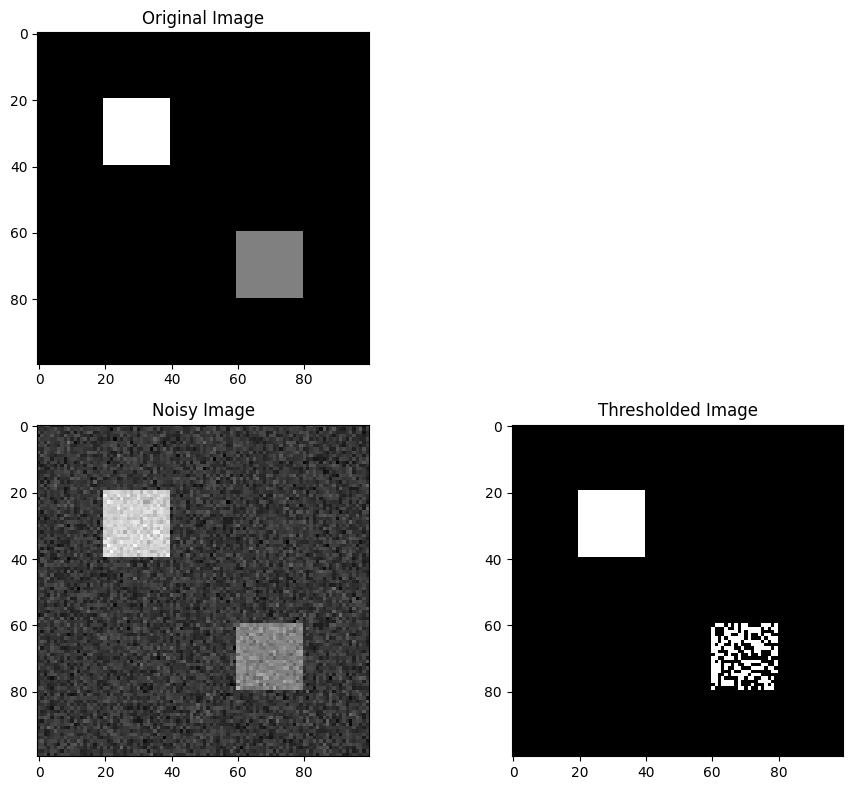

In [39]:
# Main function
if __name__ == "__main__":
    image = np.zeros((100, 100), dtype=np.uint8)
    image[20:40, 20:40] = 255
    image[60:80, 60:80] = 128

    # Gaussian noise
    noisy_image = add_gaussian_noise(image)

    # Otsu's thresholding algorithm
    threshold = otsu_thresholding(noisy_image)

    # Threshold the image
    _, thresholded_image = cv2.threshold(noisy_image, threshold, 255, cv2.THRESH_BINARY)

    # Display results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(2, 2, 3)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.subplot(2, 2, 4)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title('Thresholded Image')

    plt.tight_layout()
    plt.show()

# **Q2**

In [41]:
import numpy as np
import cv2
from queue import Queue
import matplotlib.pyplot as plt


from queue import Queue
import numpy as np

def region_growing(image, seeds, threshold):
    height, width = image.shape
    queue = Queue()

    # Create a mask to mark visited pixels during region growing.
    visited = np.zeros_like(image, dtype=np.uint8)

    # Create an image to store the segmented region.
    segmented_image = np.zeros_like(image, dtype=np.uint8)

    # Define 4-connectivity neighbors.
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Function for region growing from a seed point
    def grow_region(seed):
        queue.put(seed)
        visited[seed] = 1

        while not queue.empty():
            current_pixel = queue.get()
            x, y = current_pixel
            segmented_image[x, y] = 255

            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy

                if 0 <= nx < height and 0 <= ny < width:
                    if not visited[nx, ny]:
                        if abs(int(image[nx, ny]) - int(image[x, y])) < threshold:
                            queue.put((nx, ny))
                            visited[nx, ny] = 1

    # Loop through seeds and grow region from each seed
    for seed in seeds:
        grow_region(seed)

    return segmented_image


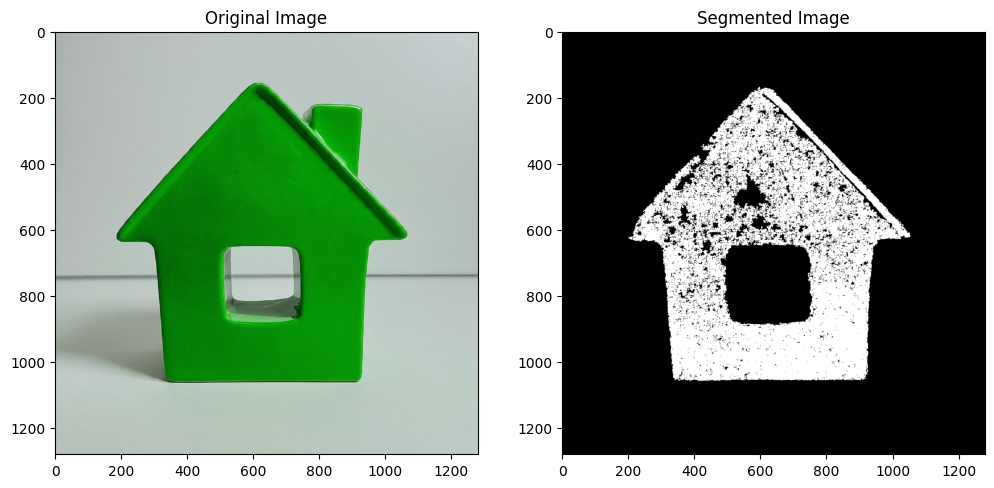

In [42]:

if __name__ == "__main__":

    image = cv2.imread("/content/image.jpg", cv2.IMREAD_GRAYSCALE)

    # Seed points for region growing.
    seeds_points = [(500, 300), (600, 250)]

    # Threshold for region growing.
    threshold = 3

    # Perform region growing segmentation.
    segmented_image = region_growing(image, seeds_points, threshold)

    # Save the segmented image.
    cv2.imwrite("Results/Q2/Q2_segmented_image.jpeg", segmented_image)

    # Display


    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.show()